<center> 
    <h1 style="font-size:90px;"> Introduction</h1>
    <h2>The goal is to predict whether a Pokémon is legendary or not?</h2>
    <h3>(By Support Vector Machine method)</h3>
</center>

# Data Dictionary

| Field            | Description                                                                       |
|------------------|-----------------------------------------------------------------------------------|
| name             | The English name of the Pokemon                                                   |
| japanese_name    | The Original Japanese name of the Pokemon                                         |
| pokedex_number   | The entry number of the Pokemon in the National Pokedex                           |
| percentage_male  | The percentage of the species that are male. Blank if the Pokemon is genderless.  |
| type1            | The Primary Type of the Pokemon                                                   |
| type2            | The Secondary Type of the Pokemon                                                 |
| classification   | The Classification of the Pokemon as described by the Sun and Moon Pokedex        |
| height_m         | Height of the Pokemon in metres                                                   |
| weight_kg        | The Weight of the Pokemon in kilograms                                            |
| capture_rate     | Capture Rate of the Pokemon                                                       |
| base_egg_steps   | The number of steps required to hatch an egg of the Pokemon                       |
| abilities        | A stringified list of abilities that the Pokemon is capable of having             |
| experience_growth| The Experience Growth of the Pokemon                                              |
| base_happiness   | Base Happiness of the Pokemon                                                     |
| against_?        | Eighteen features that denote the amount of damage taken against an attack of a particular type |
| hp               | The Base HP of the Pokemon                                                        |
| attack           | The Base Attack of the Pokemon                                                    |
| defense          | The Base Defense of the Pokemon                                                   |
| sp_attack        | The Base Special Attack of the Pokemon                                            |
| sp_defense       | The Base Special Defense of the Pokemon                                           |
| speed            | The Base Speed of the Pokemon                                                     |
| generation       | The numbered generation which the Pokemon was first introduced                    |
| is_legendary     | Denotes if the Pokemon is legendary                                               |


# Importing Libraries and Dataset

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

In [108]:
df = pd.read_csv(r"D:\CP_MAI391_GROUP6\pokemon-1.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [109]:
df.columns.values

array(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'], dtype=object)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


# Data Loading and Initial Exploration

### Change the position of the name attribute

In [112]:
df.insert(0, 'name', df.pop('name'))   # done to easily identify names
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Null Values

In [113]:
df.isnull().sum()

name                   0
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


$ \implies $ <b>"height_m"</b> has 20 Null Values.<p>
$ \implies $ <b>"weight_kg"</b> has 20 Null Values.<p>
$ \implies $ <b>"percentage_male"</b> has 98 Null Values.<p>
$ \implies $ <b>"type2"</b> has 384 Null values.<p>

### Data Imputation

In [114]:
# Fill missing values in type2 column with type1 column
df['type2'].fillna(df['type1'], inplace=True)

# Fill missing values in height_m column with average of the column
df['height_m'].fillna(np.round(df['height_m'].mean(), 2), inplace=True)

# Fill missing values in weight_kg column with average of the column
df['weight_kg'].fillna(np.round(df['weight_kg'].mean()), inplace=True)

# Add a new column called 'genderless' that is 1 if the Pokemon is genderless and 0 if it is not
df['genderless'] = np.where(df['percentage_male'].isna(), 1, 0)

# Fill missing values in percentage_male column with 50
df['percentage_male'].fillna(50, inplace=True)

In [115]:
df.isnull().sum()

name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
genderless           0
dtype: int64

### capture_rate attribute

In [116]:
for i in df.capture_rate:
    print(i, end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

$ \implies $ As we can see in the output values there is one value <b>"30 (Meteorite)255 (Core)"</b>.

In [117]:
df[df["capture_rate"]=="30 (Meteorite)255 (Core)"]

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless
773,Minior,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,...,774,100,60,120,rock,flying,40.0,7,0,1


$ \implies $ We know its a rock/fly type pokemon, therefore, we will replace it with <b>"Meteorite"</b> capture_rate of 30.

In [118]:
# replacing with 30
df["capture_rate"].replace({"30 (Meteorite)255 (Core)": "30"}, inplace=True)

# converting into integer type attribute
df["capture_rate"] = df["capture_rate"].astype('int')
df["capture_rate"].dtype

dtype('int32')

### Dropping unncessary attributes

In [119]:
df.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 

In [120]:
# adding total abilities that a pokemon has
df["tot_abilities"] = df.apply(lambda x: len(x["abilities"]), axis=1)
df.head()

,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,genderless,tot_abilities
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,65,65,45,grass,poison,6.9,1,0,0,27
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,80,80,60,grass,poison,13.0,1,0,0,27
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,...,122,120,80,grass,poison,100.0,1,0,0,27
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,60,50,65,fire,fire,8.5,1,0,0,24
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,80,65,80,fire,fire,19.0,1,0,0,24


In [121]:
# merging type1 and type2 and adding into new column=> type, 
# and renaming type1 to primary and type2 to secondary
df['type'] =  df.apply(lambda x: x['type1'] if pd.isnull(x['type2']) else f'{x["type1"]}_{x["type2"]}', axis=1)
df.rename(columns = {'type1':'primary type', 'type2':'secondary type'}, inplace = True)

# Checking the final shape of df before moving into visualizations
df.shape

(801, 41)

# Data Analysis 

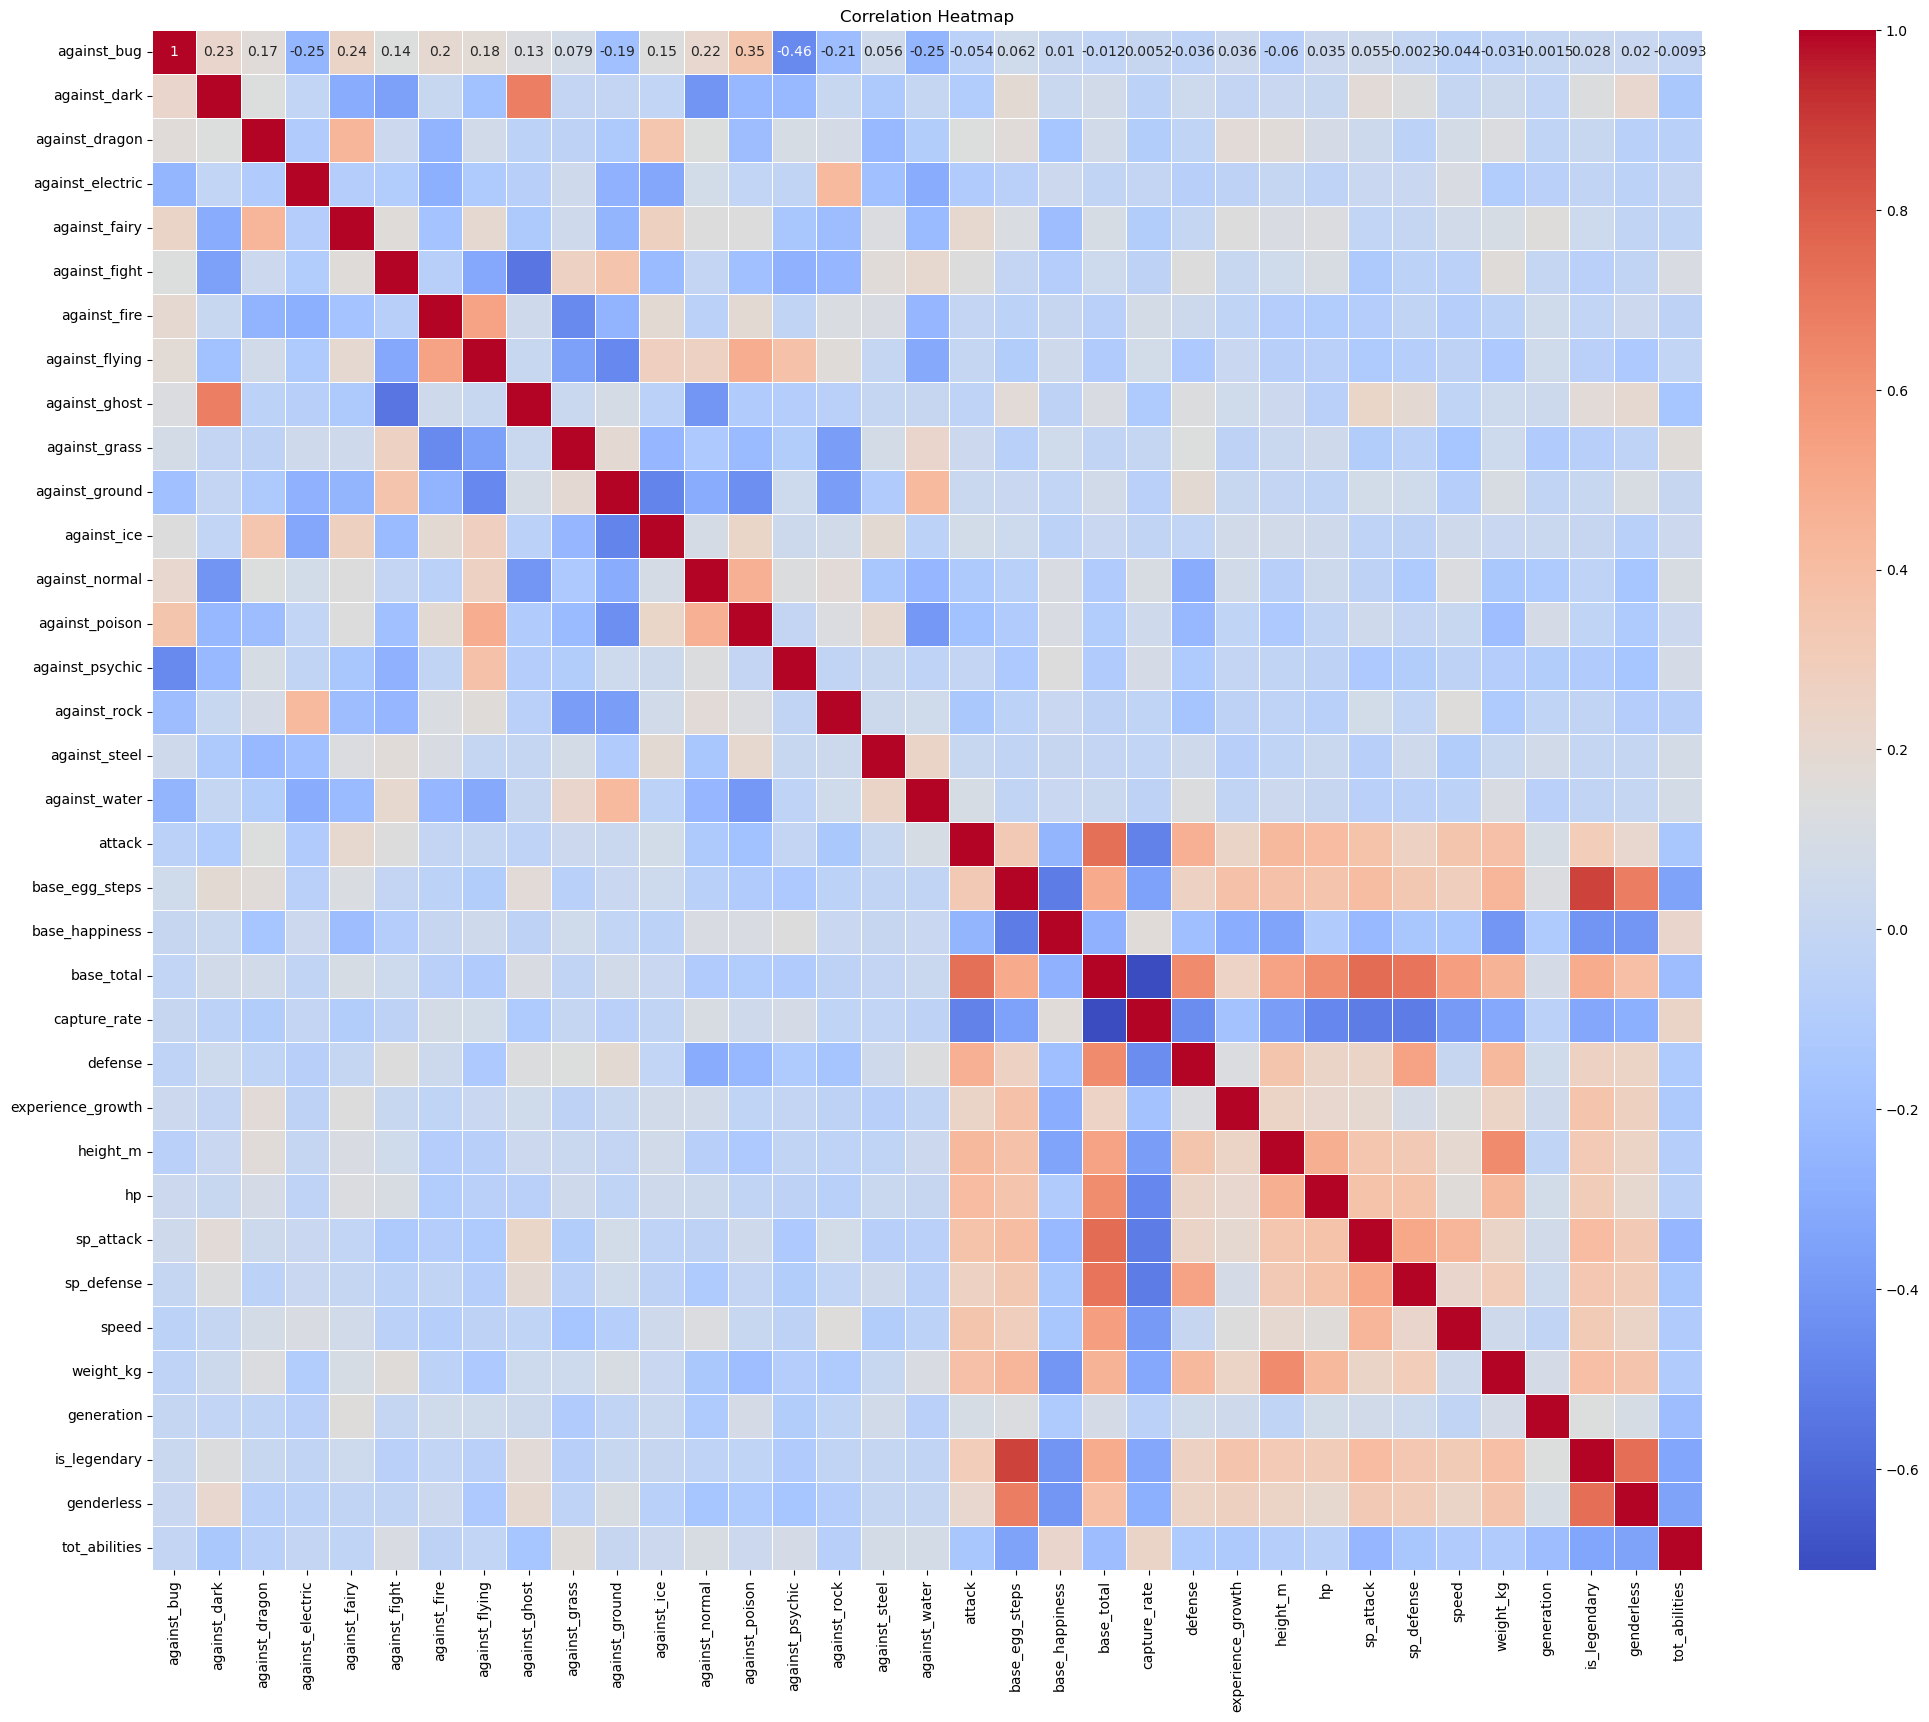

In [122]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap")
plt.show()

In [123]:
against=[]
rest=[]
for i in df.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

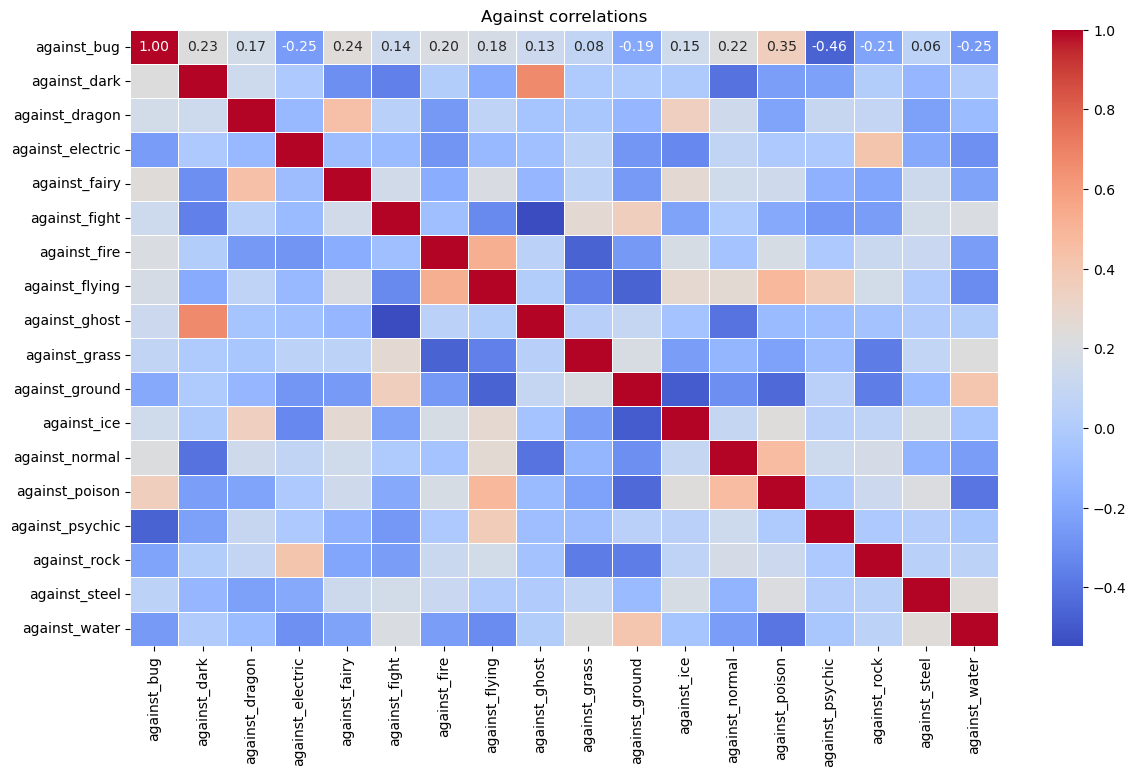

In [124]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[against].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt= '.2f')
plt.title("Against correlations")
plt.show()

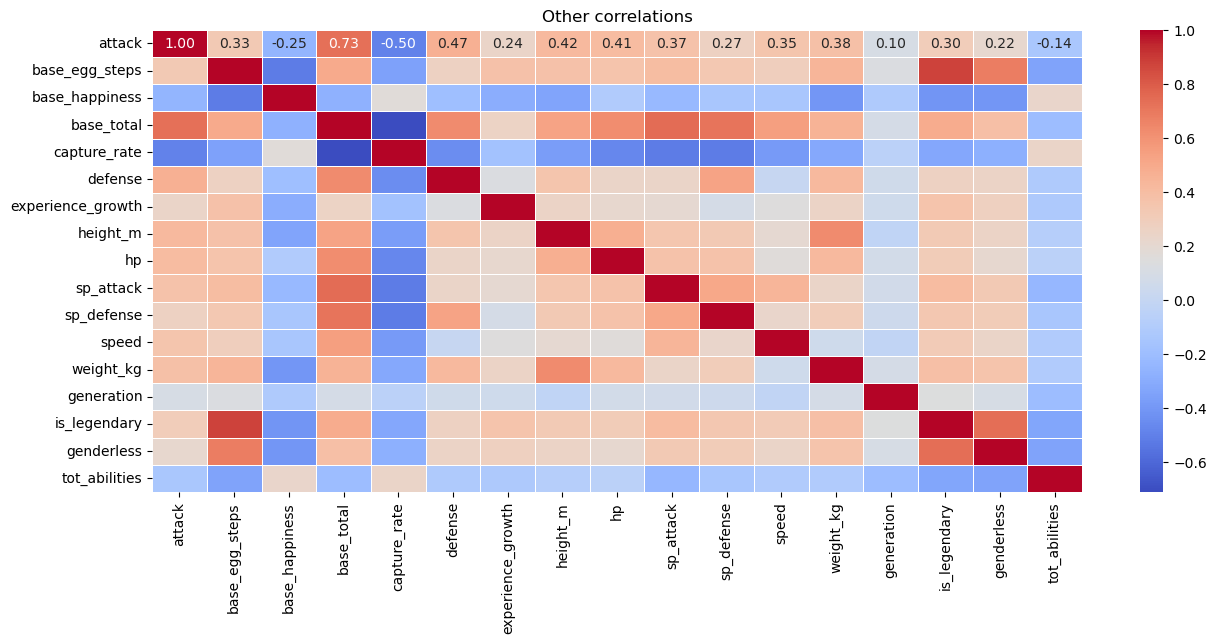

In [125]:
plt.figure(figsize=(15, 6))
sns.heatmap(df[rest].corr(numeric_only=True), annot=True,  cmap='coolwarm', linewidths=0.5, fmt= '.2f').set_title("Other correlations")
plt.show()

$ \implies $ <b>base_total</b> has good correlation with <b><i>attack, defense, sp_attack, and sp_defense</i></b>.<p>
$ \implies $ <b>base_egg_steps</b> have a huge correlation with <b><i>is_legendary</b></i> attribute.<p>
$ \implies $ <b>weight_kg</b> is also very correlated with <b><i>height_m</b></i>.</p>

# Visualizations

### 1. Count of Pokemons per generation

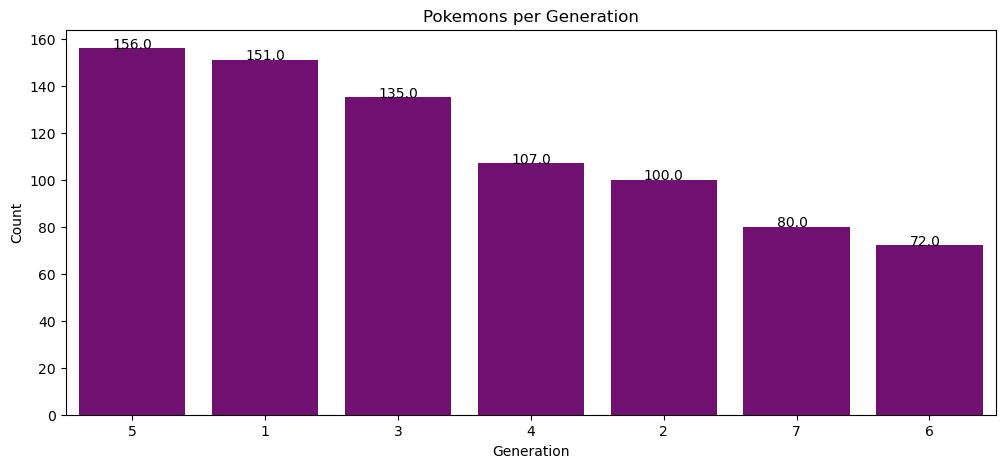

In [126]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='generation',data=df,order=df['generation'].value_counts().index,color='Purple')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

### 2. Distribution of Primary and Secondary Types of pokemon

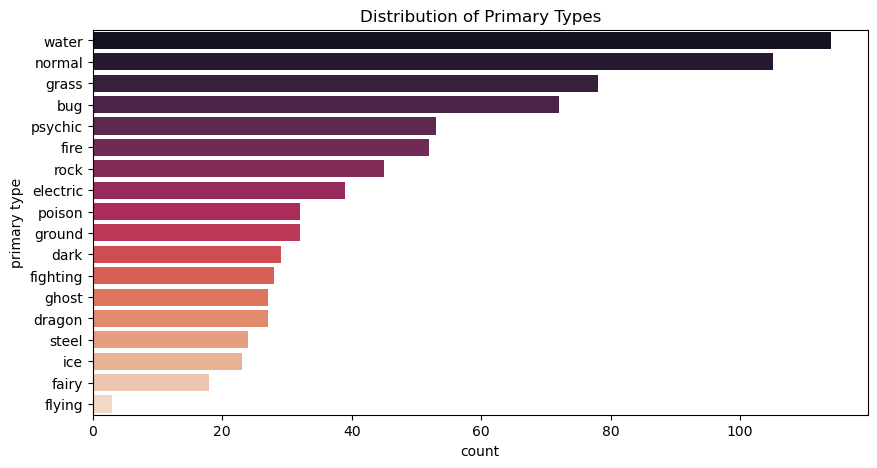

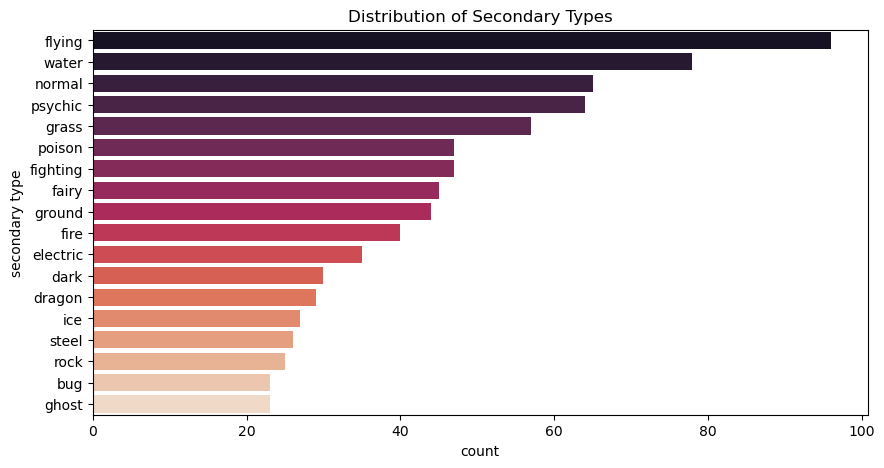

In [127]:
# Bar charts for primary type
plt.figure(figsize=(10, 5))
sns.countplot(y='primary type', data=df, order=df['primary type'].value_counts().index, palette='rocket')
plt.title('Distribution of Primary Types')
plt.show()

# Bar charts for secondary type
plt.figure(figsize=(10, 5))
sns.countplot(y='secondary type', data=df, order=df['secondary type'].value_counts().index, palette='rocket')
plt.title('Distribution of Secondary Types')
plt.show()

* Most occured pokemon type:<p>
    * Primary type = Water Type<p>
    * Secondary type = None; followed by flying type<p>
* Least occured pokemon type:<p>
    * Primary type = flying<p>
    * Secondary type = normal<p>

### 3. Types of Pokemons in each Generation

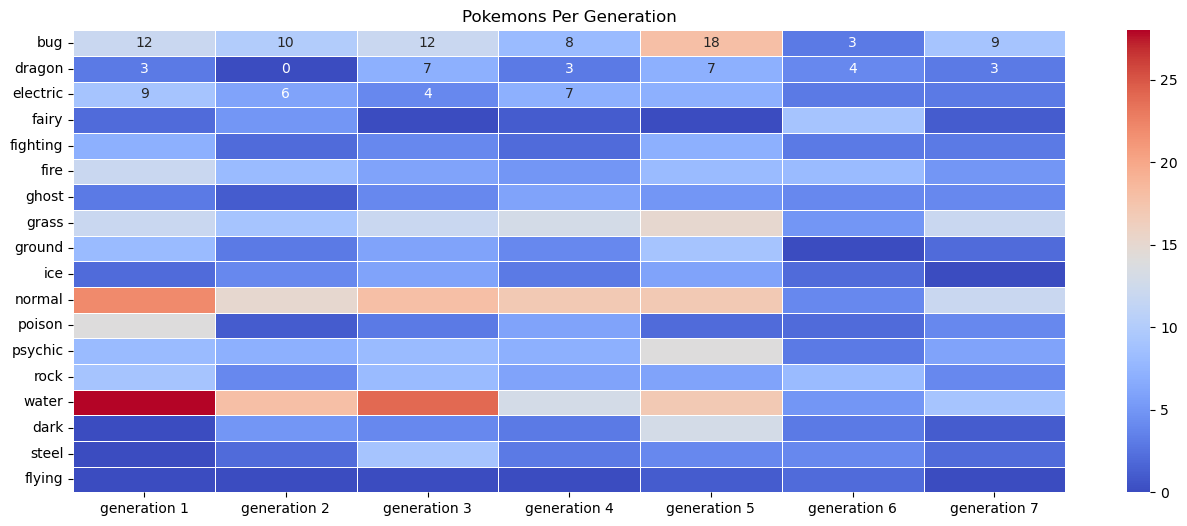

In [128]:
primary_type_generation_group = df.groupby(['generation', 'primary type'])['name'].count().to_frame().reset_index()
primary_type_generation_group.rename(columns={'name' : 'name_count'}, inplace=True)
primary_type_generation_dict  = {}
for generation in list(primary_type_generation_group['generation'].unique()):
    current_generation = []
    for p_type in primary_type_generation_group['primary type'].unique():
        try:
            current_generation.append(
                primary_type_generation_group.loc[(primary_type_generation_group['generation']==generation) 
                                        & (primary_type_generation_group['primary type'] == p_type)]['name_count'].values[0])
        except IndexError:
            current_generation.append(0)
    primary_type_generation_dict[f'generation {generation}'] = current_generation

p_type_by_generation = pd.DataFrame(primary_type_generation_dict, index= primary_type_generation_group['primary type'].unique())
fig,axes = plt.subplots(figsize=(16,6))
sns.heatmap(p_type_by_generation, annot=True, cmap='coolwarm', linewidths=0.5).set_title('Pokemons Per Generation')
plt.show()

* Only Gen 5 & 6 have flying type pokemons
* In Gen 1, there is no dark, steel & flying type pokemons
* In Gen 1, 2, & 3, water type pokemons are most common
* In Gen 4, normal type pokemons are most common
* In Gen 5, bug type pokemons are most common
* In Gen 6, fairy type pokemons are most common
* In Gen 7, normal & grass type pokemons are most common

### 4. Easiest / Hardest Pokemon Type to catch

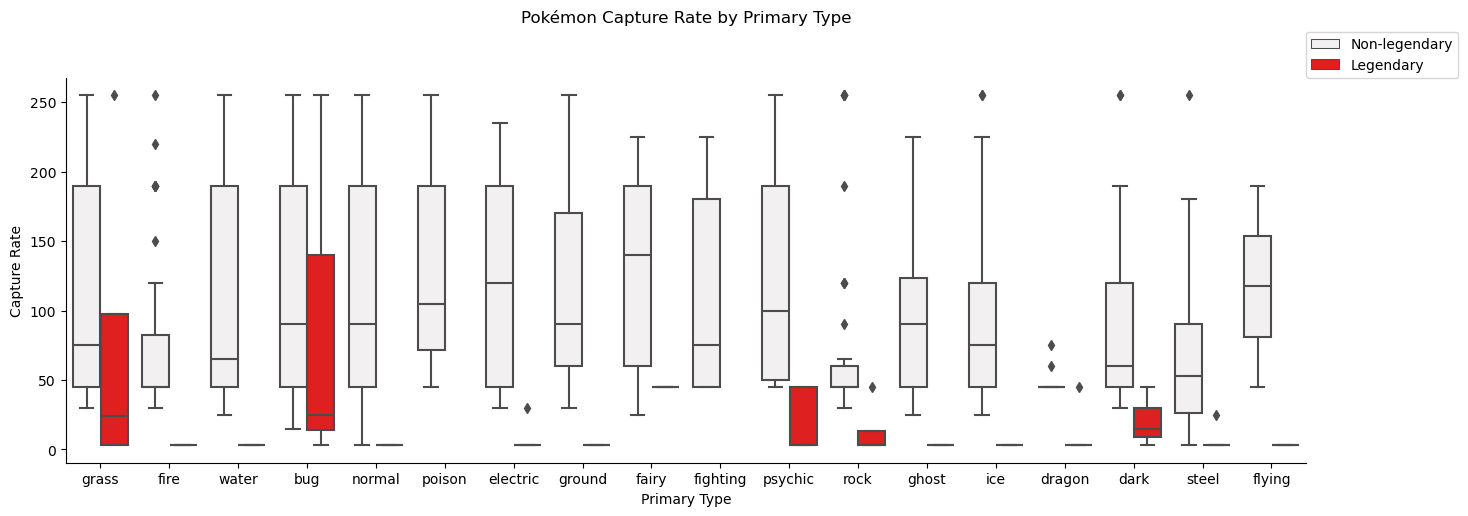

In [129]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(x='primary type',y='capture_rate', hue='is_legendary', data = df, color="red")

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Primary Type', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

<i>The easiest pokemon type to catch is <b>"fairy"</b> and hardest to catch is <b>"dragon"</b> type.<br>
It is also hard to catch<b> "rock"</b> and<b> "fire"</b> type pokemons. <p>
In legendary pokemons, easiest to catch are from<b> "bug" </b>and<b> "grass"</b> types.

### 5. Strongest Pokemon

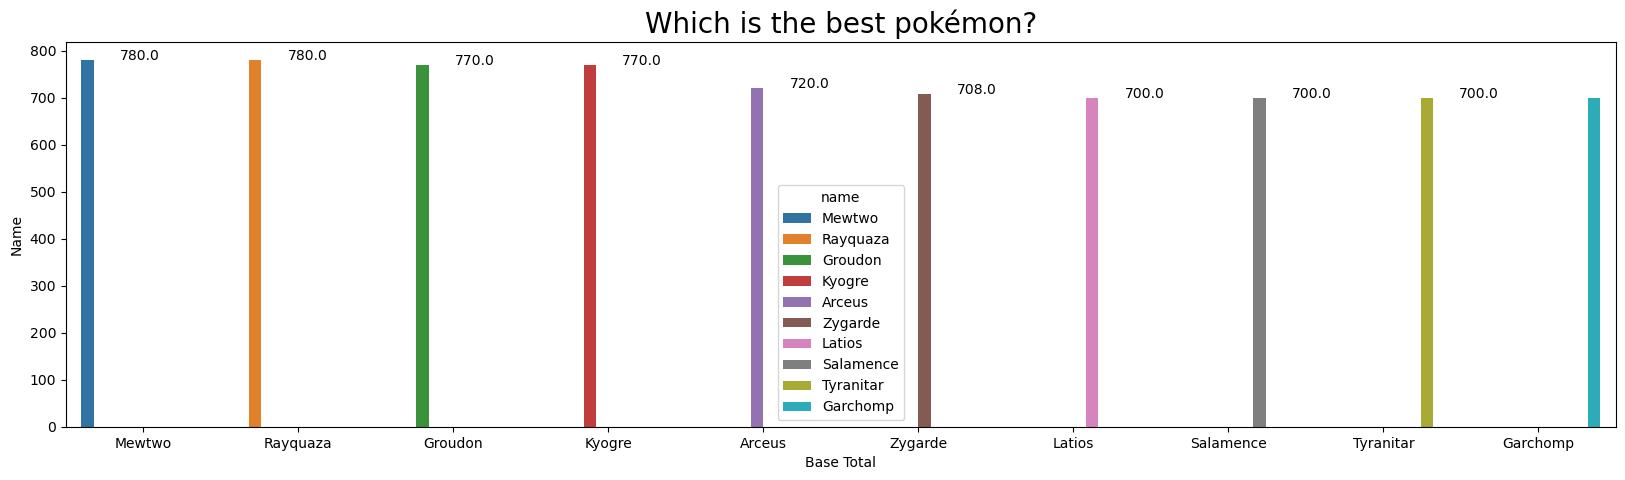

In [130]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,5))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v', hue=top10_pokemon_base_total["name"])
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<i>SO, the strongest pokemons being <b>Mewtwo, Rayquaza</b>, followed by <b>Groudon, Kyogre, </b>and others.

### 6. Weakest Pokemon

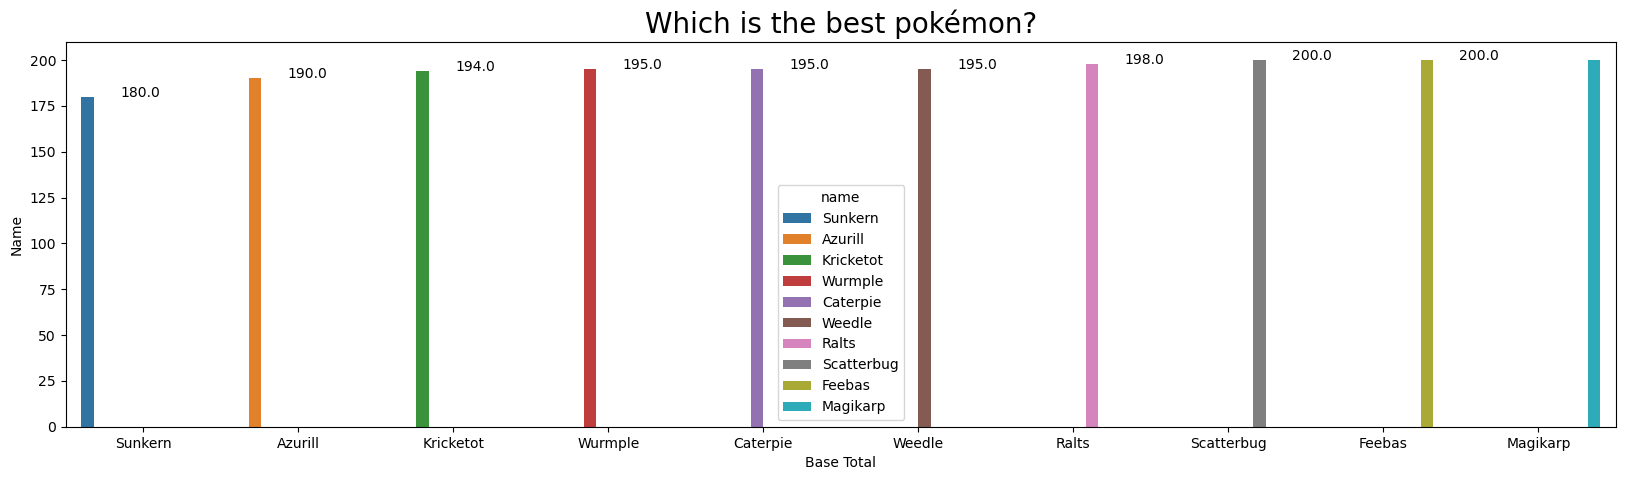

In [131]:
top10_pokemon_base_total = df.sort_values(by="base_total", ascending=True).reset_index()[:10]
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v', hue=top10_pokemon_base_total["name"])
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

<i>So, the weakest pokemon is <b>Sunkern</b>, followed by <b>Azurill, Kricketot</b>, and others.

### 7. Count of legendary pokemons

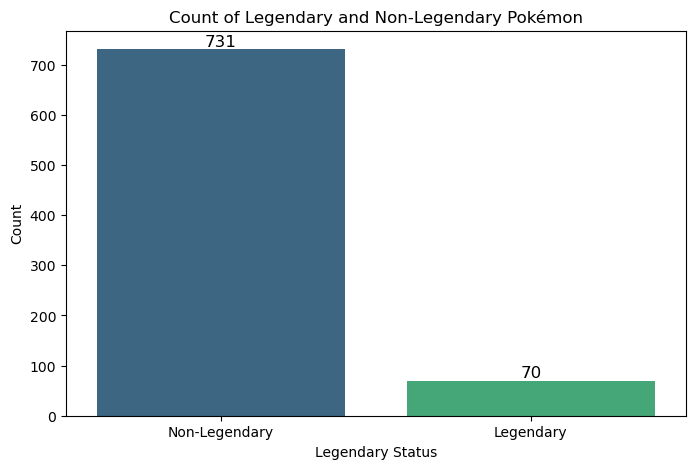

In [132]:
legendary_counts = df['is_legendary'].value_counts()

plt.figure(figsize=(8, 5))
bar = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Count of Legendary and Non-Legendary Pokémon')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])

for i in range(len(legendary_counts)):
    bar.text(i, legendary_counts.values[i] + 0.1, legendary_counts.values[i], ha='center', va='bottom', fontsize=12)

plt.show()

### 8. What is the most common type among legendary pokemons?

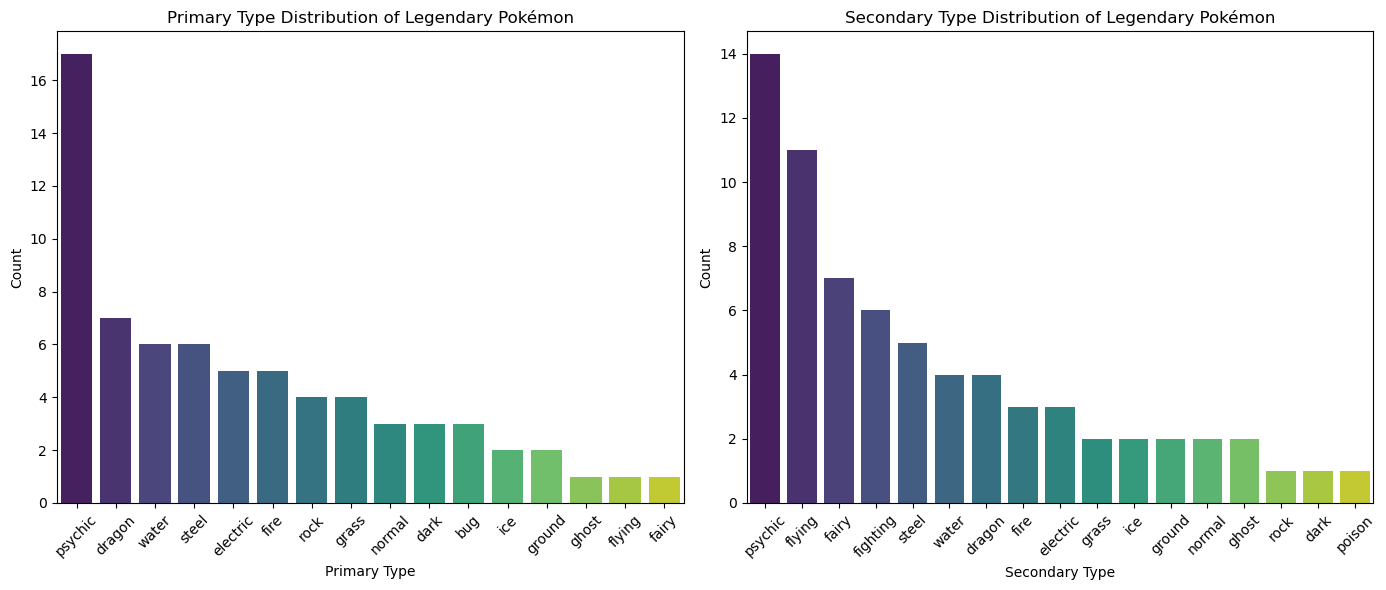

In [133]:
# Filter for legendary Pokémon
legendary_pokemon = df[df['is_legendary']==1]

# Count primary and secondary types
primary_type_counts = legendary_pokemon['primary type'].value_counts()
secondary_type_counts = legendary_pokemon['secondary type'].value_counts(dropna=False)

# Plot the distribution of primary types
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=primary_type_counts.index, y=primary_type_counts.values, palette="viridis")
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Primary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Plot the distribution of secondary types
plt.subplot(1, 2, 2)
sns.barplot(x=secondary_type_counts.index, y=secondary_type_counts.values, palette="viridis")
plt.xlabel('Secondary Type')
plt.ylabel('Count')
plt.title('Secondary Type Distribution of Legendary Pokémon')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

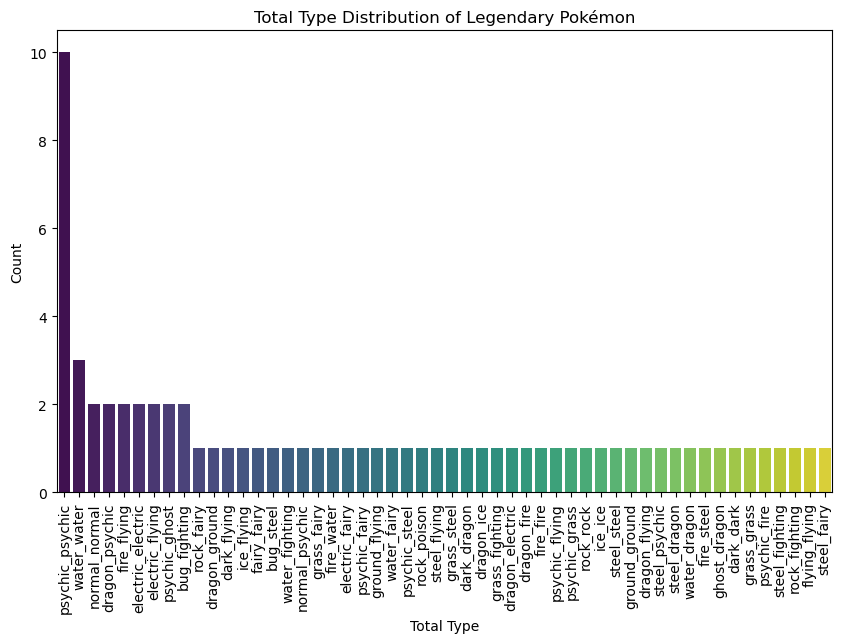

In [134]:
# Filter for legendary Pokémon
legendary_pokemon = df[df['is_legendary'] == 1]

# Count occurrences of each total type
total_type_counts = legendary_pokemon['type'].value_counts()

# Plot the distribution of total types
plt.figure(figsize=(10, 6))
sns.barplot(x=total_type_counts.index, y=total_type_counts.values, palette="viridis")
plt.xlabel('Total Type')
plt.ylabel('Count')
plt.title('Total Type Distribution of Legendary Pokémon')
plt.xticks(rotation=90)

# Display the plot
plt.show()

* If a pokemon have primary type as <b>"psychic"</b> then it has a very high chance of being a legendary pokemon.
* If a pokemon have secondary type as <b>"flying"</b> then it has a very high chance of being a legendary pokemon.
* If a pokemon have primary and secondary type as follows then it has a good chance of being a legendary pokemon as well:
    * Dragon and Psychic type
    * Fire and Flying type
    * Electric and Flying type
    * Psychic and Ghost type
    * Bug anf Fighting type
 

# Classifying Legendary or not?

### Gradients for SVM Classifier

In [135]:
class SVM_classifier:
    def __init__(self, learning_rate=0.001, no_of_iterations=50000, lambda_parameter=0.00001):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = np.array(X, dtype=np.float64)
        self.Y = np.array(Y, dtype=np.float64)

        y_label = np.where(self.Y <= 0, -1, 1)
        for i in range(self.no_of_iterations):
            self.update_weights(y_label)

    def update_weights(self, y_label):
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
            if condition:
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    def predict(self, X):
        X = np.array(X, dtype=np.float64)  # Đảm bảo X là mảng số

        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat



In [136]:
featured_df = df[['attack', 'base_egg_steps', 'base_total','defense', 'experience_growth',
                  'height_m','hp', 'weight_kg','sp_attack','sp_defense','speed','tot_abilities',
                  'is_legendary']]
featured_df

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,49,5120,318,49,1059860,0.7,45,6.9,65,65,45,27,0
1,62,5120,405,63,1059860,1.0,60,13.0,80,80,60,27,0
2,100,5120,625,123,1059860,2.0,80,100.0,122,120,80,27,0
3,52,5120,309,43,1059860,0.6,39,8.5,60,50,65,24,0
4,64,5120,405,58,1059860,1.1,58,19.0,80,65,80,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,570,103,1250000,9.2,97,999.9,107,101,61,15,1
797,181,30720,570,131,1250000,0.3,59,0.1,59,31,109,15,1
798,101,30720,570,53,1250000,5.5,223,888.0,97,53,43,15,1
799,107,30720,600,101,1250000,2.4,97,230.0,127,89,79,15,1


In [137]:
featured_df.is_legendary.value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

In [138]:
is_legendary_0, is_legendary_1 = featured_df.is_legendary.value_counts()

In [139]:
#divide by class
df_class_0 = featured_df[featured_df['is_legendary'] == 0]
print(df_class_0.shape)
df_class_1 = featured_df[featured_df['is_legendary'] == 1]
print(df_class_1.shape)

(731, 13)
(70, 13)


In [140]:
df_class_0_under = df_class_0.sample(n=500)
df_test = pd.concat([df_class_0_under, df_class_1], axis = 0).reset_index(drop=True)
df_test

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,98,5120,498,63,1000000,1.1,75,30.5,98,63,101,24,0
1,48,5120,314,65,1059860,0.5,44,9.0,50,64,43,24,0
2,61,2560,300,40,1000000,0.7,48,23.0,61,40,50,44,0
3,65,5120,390,45,1000000,1.2,65,38.0,75,45,95,40,0
4,75,6400,365,37,1000000,0.7,45,21.4,70,55,83,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,101,30720,570,103,1250000,9.2,97,999.9,107,101,61,15,1
566,181,30720,570,131,1250000,0.3,59,0.1,59,31,109,15,1
567,101,30720,570,53,1250000,5.5,223,888.0,97,53,43,15,1
568,107,30720,600,101,1250000,2.4,97,230.0,127,89,79,15,1


In [141]:
x = df_test.drop('is_legendary', axis=1)
y = df_test['is_legendary']

In [142]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)
print(y_sm.value_counts())

df_test_1=  pd.concat([pd.DataFrame(x_sm), pd.DataFrame(y_sm, columns=['is_legendary'])], axis=1)
df_test_1.sample(10)

is_legendary
0    500
1    500
Name: count, dtype: int64


,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
37,70,8960,330,100,1250000,0.400000,50,60.000000,40,40,30,38,0
851,103,20480,580,104,1250000,0.396962,80,4.116159,104,106,80,12,1
972,102,30720,600,81,1059860,0.254969,100,2.622202,114,81,119,27,1
760,79,3599,575,112,1250000,1.112131,75,17.480202,95,124,87,25,1
106,50,5120,300,50,1000000,0.700000,50,16.800000,50,50,50,36,0
66,91,5120,490,63,1059860,1.500000,104,84.000000,91,73,68,25,0
893,106,3079,587,109,1250000,1.781235,82,273.825875,111,101,76,28,1
191,85,5120,363,49,1059860,0.900000,60,30.500000,60,49,60,33,0
943,120,30720,600,102,1250000,1.259809,84,74.004774,117,96,78,29,1
593,90,3026,589,105,1250000,0.664402,89,8.615164,98,110,94,18,1


In [143]:
print('Original dataset shape:', featured_df.is_legendary.value_counts())
print('Resampled dataset shape:', df_test.is_legendary.value_counts())
print('Final dataset shape:', y_sm.value_counts())

Original dataset shape: is_legendary
0    731
1     70
Name: count, dtype: int64
Resampled dataset shape: is_legendary
0    500
1     70
Name: count, dtype: int64
Final dataset shape: is_legendary
0    500
1    500
Name: count, dtype: int64


In [144]:
df_test_1.to_csv('df_test_1.csv', index=False)

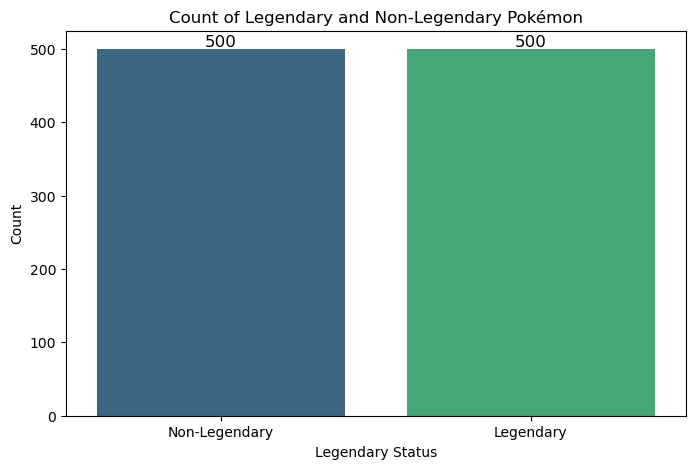

In [145]:
legendary_counts = df_test_1['is_legendary'].value_counts()

plt.figure(figsize=(8, 5))
bar = sns.barplot(x=legendary_counts.index, y=legendary_counts.values, palette="viridis")
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.title('Count of Legendary and Non-Legendary Pokémon')
plt.xticks(ticks=[0, 1], labels=['Non-Legendary', 'Legendary'])

for i in range(len(legendary_counts)):
    bar.text(i, legendary_counts.values[i] + 0.1, legendary_counts.values[i], ha='center', va='bottom', fontsize=12)

plt.show()

In [146]:
df_test_1.shape

(1000, 13)

In [147]:
df_test_1.duplicated().sum()

0

In [148]:
df_test_1.head()

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,98,5120,498,63,1000000,1.1,75,30.5,98,63,101,24,0
1,48,5120,314,65,1059860,0.5,44,9.0,50,64,43,24,0
2,61,2560,300,40,1000000,0.7,48,23.0,61,40,50,44,0
3,65,5120,390,45,1000000,1.2,65,38.0,75,45,95,40,0
4,75,6400,365,37,1000000,0.7,45,21.4,70,55,83,30,0


## Scaling

In [149]:
df_test_1 = (df_test_1 - df_test_1.min())/(df_test_1.max() - df_test_1.min())
df_test_1.head()

,attack,base_egg_steps,base_total,defense,experience_growth,height_m,hp,weight_kg,sp_attack,sp_defense,speed,tot_abilities,is_legendary
0,0.516667,0.130435,0.530000,0.257778,0.384615,0.069444,0.291339,0.030406,0.478261,0.204762,0.548571,0.1875,0.0
1,0.238889,0.130435,0.223333,0.266667,0.442173,0.027778,0.169291,0.008902,0.217391,0.209524,0.217143,0.1875,0.0
2,0.311111,0.043478,0.200000,0.155556,0.384615,0.041667,0.185039,0.022905,0.277174,0.095238,0.257143,0.4375,0.0
3,0.333333,0.130435,0.350000,0.177778,0.384615,0.076389,0.251969,0.037908,0.353261,0.119048,0.514286,0.3875,0.0
4,0.388889,0.173913,0.308333,0.142222,0.384615,0.041667,0.173228,0.021304,0.326087,0.166667,0.445714,0.2625,0.0


In [150]:
x1 = df_test_1.drop('is_legendary', axis=1)
y2 = df_test_1['is_legendary']

In [151]:
# Chia dữ liệu thành train và test set
x_train, x_test, y_train, y_test = train_test_split(x1, y2, test_size=0.2, random_state=15, stratify=y2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 12), (200, 12), (800,), (200,))

In [152]:
y_train.value_counts()

is_legendary
1.0    400
0.0    400
Name: count, dtype: int64

In [153]:
# Kiểm tra số lượng đặc trưng
features = x_train.shape[1]
print("Number of features in x_train:", features)

Number of features in x_train: 12


In [154]:
x_test.value_counts()

attack    base_egg_steps  base_total  defense   experience_growth  height_m  hp        weight_kg  sp_attack  sp_defense  speed     tot_abilities
0.000000  0.304348        0.450000    0.000000  0.192308           0.069444  0.980315  0.034507   0.135870   0.404762    0.257143  0.4125           1
0.555556  0.130435        0.458333    0.244444  0.384615           0.062500  0.251969  0.031906   0.271739   0.238095    0.514286  0.4125           1
0.527778  1.000000        0.700000    0.417778  0.625000           0.015514  0.385827  0.002305   0.489130   0.376190    0.537143  0.0875           1
                                      0.422222  0.442173           0.020833  0.389764  0.003901   0.489130   0.380952    0.542857  0.0750           1
                                                                   0.034722  0.389764  0.004901   0.489130   0.380952    0.542857  0.0875           1
                                                                                                         

In [155]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.00001, n_iters=50000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, x, y):
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float)
        n_samples, n_features = x.shape

        y_ = np.where(y == 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(x):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, x):
        x = np.array(x, dtype=float)
        approx = np.dot(x, self.w) - self.b
        return np.where(np.sign(approx) == -1, 0, 1)  # Convert -1, 1 back to 0, 1


In [156]:
class SVM1:
  def __init__(self, kernel='linear', C=10000.0, max_iter=100, degree=3, gamma=1):
    self.kernel = {'poly'  : lambda x,y: np.dot(x, y.T)**degree,
                   'rbf'   : lambda x,y: np.exp(-gamma*np.sum((y - x[:,np.newaxis])**2, axis=-1)),
                   'linear': lambda x,y: np.dot(x, y.T)}[kernel]
    self.C = C
    self.max_iter = max_iter
  def restrict_to_square(self, t, v0, u):
    t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
    return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]
  def fit(self, x, y):
    self.x = np.array(x, dtype=float)
    self.y = np.array(y * 2 - 1, dtype=float)
    self.lambdas = np.zeros_like(self.y, dtype=float)
    self.K = self.kernel(self.x, self.x) * self.y[:,np.newaxis] * self.y  

    for _ in range(self.max_iter):
      for idxM in range(len(self.lambdas)):
        idxL = np.random.randint(0, len(self.lambdas))
        Q = self.K[[[idxM, idxM], [idxL, idxL]], [[idxM, idxL], [idxM, idxL]]]
        v0 = self.lambdas[[idxM, idxL]]
        k0 = 1 - np.sum(self.lambdas * self.K[[idxM, idxL]], axis=1)
        u = np.array([-self.y[idxL], self.y[idxM]])
        t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15)
        self.lambdas[[idxM, idxL]] = v0 + u * self.restrict_to_square(t_max, v0, u) 
      
    idx, = np.nonzero(self.lambdas > 1E-15)
    self.b = np.mean((1.0 - np.sum(self.K[idx] * self.lambdas, axis=1)) * self.y[idx])
  def decision_function(self, x):
    x = np.array(x, dtype=float)  # Chuyển đổi thành numpy array
    return np.sum(self.kernel(x, self.x) * self.y * self.lambdas, axis=1) + self.b
  def predict(self, X):
    return (np.sign(self.decision_function(X)) + 1) // 2

In [157]:
# Huấn luyện model SVM trên dữ liệu đã được resample
svm = SVM1(kernel='rbf', C=100, gamma=1)
svm.fit(x_train, y_train)

In [158]:
# Dự đoán trên tập test
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

Accuracy of SVM model:  1.00
Precision of SVM model:  1.00
Recall of SVM model:  1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



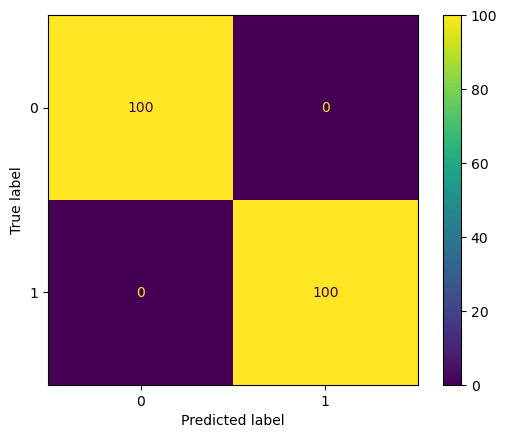

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Ma trận nhầm lẫn
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['0', '1'])
cm_display_svm.plot()

# Đánh giá model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy of SVM model: {accuracy_svm: .2f}')
print(f'Precision of SVM model: {precision_svm: .2f}')
print(f'Recall of SVM model: {recall_svm: .2f}')
print('\nClassification Report:')
print(classification_report_svm)